In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('manufacturing.csv')
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [ ]:
df.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')

In [ ]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [ ]:
df.isnull().sum()

,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0
Quality Rating,0


In [ ]:
df.duplicated().sum()

0

Dropping the column which is a combination of Temperature and Pressure. This column can be delelted as we are able to get the desired result from Temperature and Pressure columns already.

In [ ]:
df.drop('Temperature x Pressure', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Material Fusion Metric',
       'Material Transformation Metric', 'Quality Rating'],
      dtype='object')

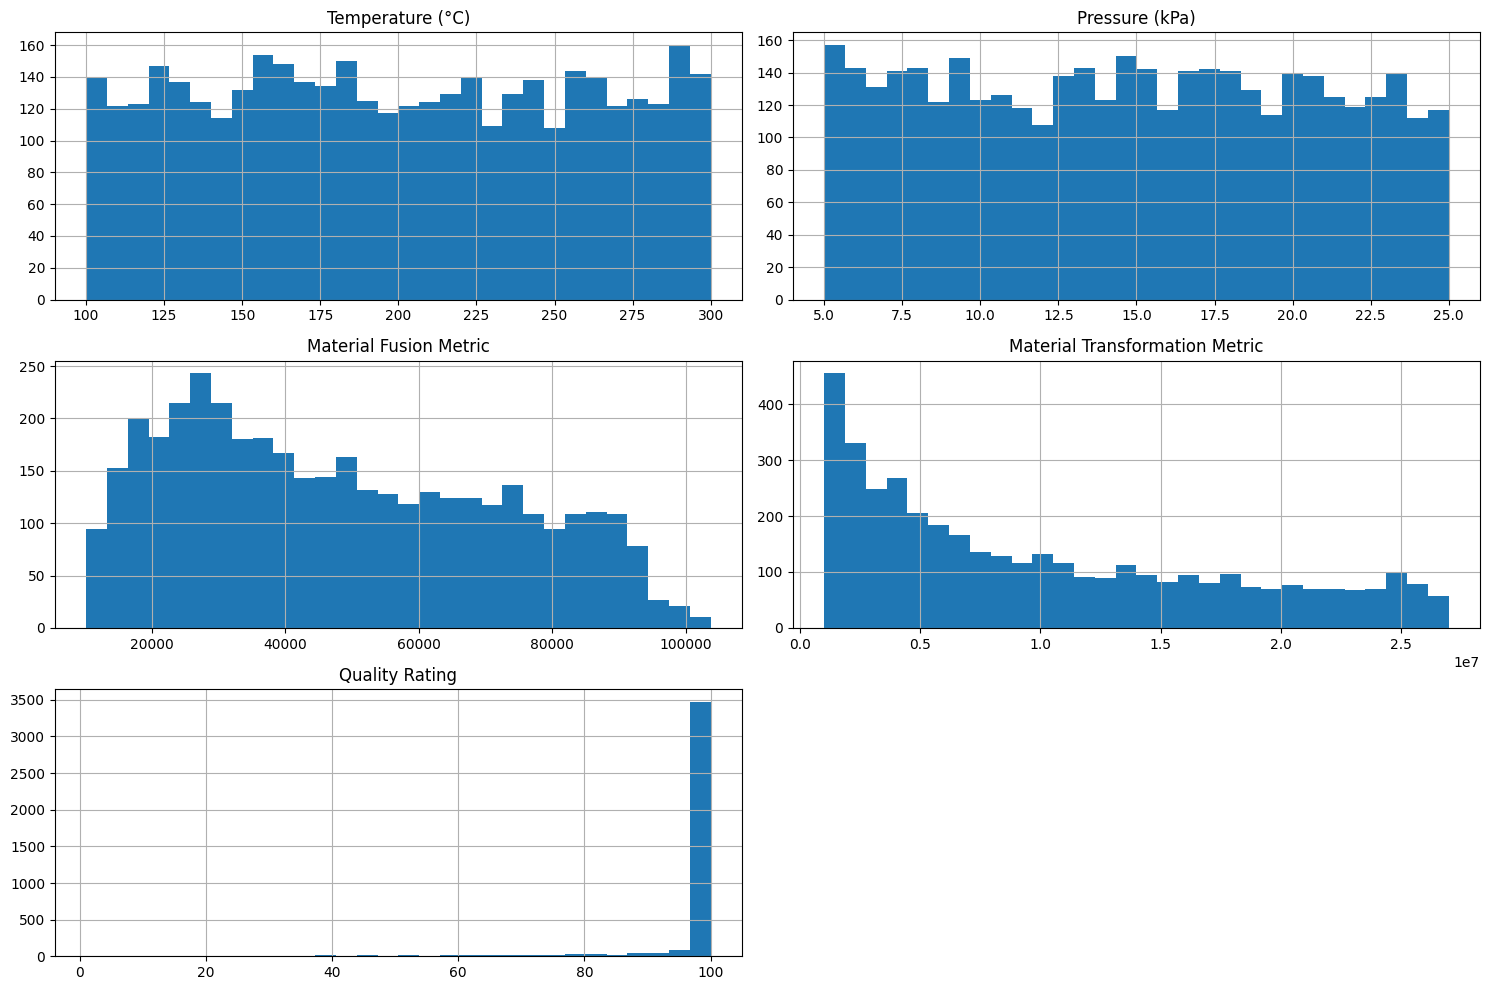

In [ ]:
#visualizing the distribution f each numerical coloumn
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

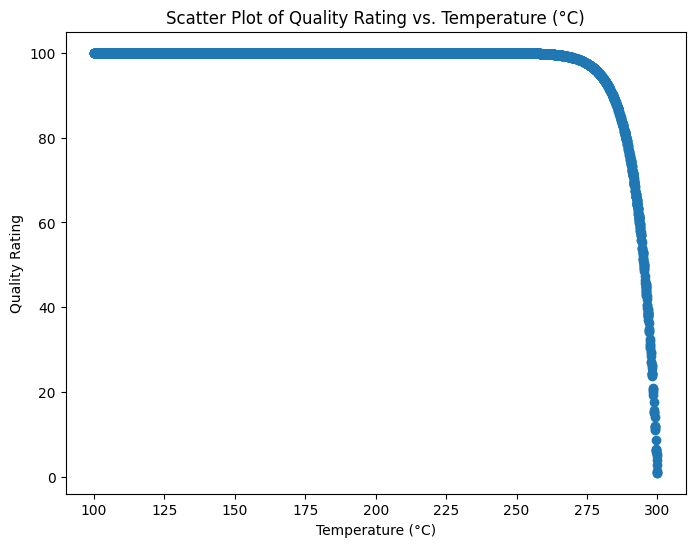

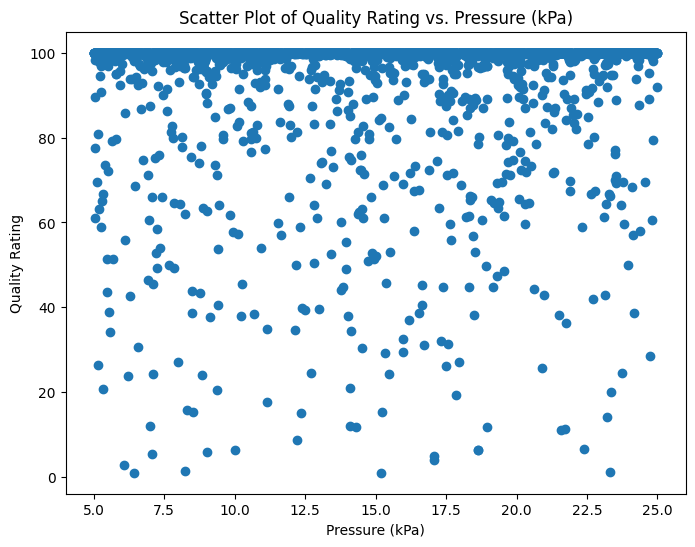

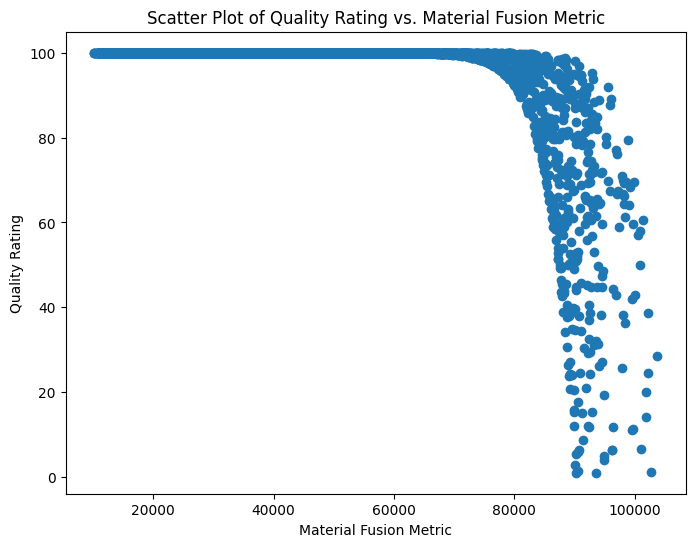

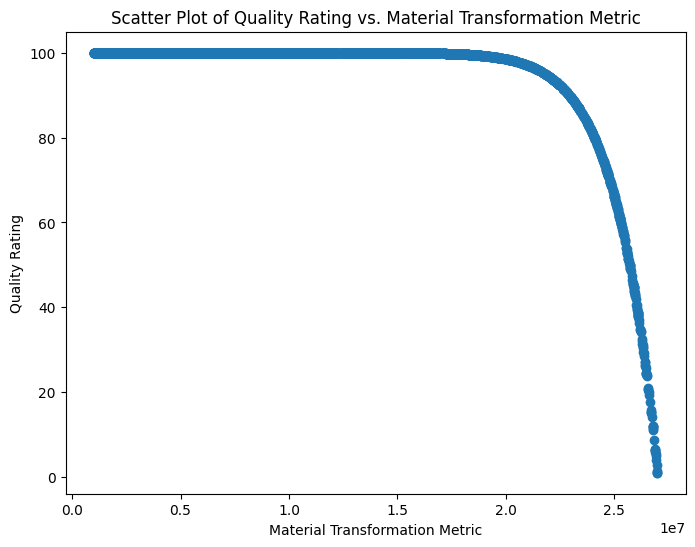

In [ ]:

# Get the list of all columns excluding 'quality rating'
independent_variables = df.columns.drop('Quality Rating')

# Create scatter plots for quality rating against each independent variable
for variable in independent_variables:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.scatter(df[variable], df['Quality Rating'])
    plt.xlabel(variable)
    plt.ylabel('Quality Rating')
    plt.title(f'Scatter Plot of Quality Rating vs. {variable}')
    plt.show()

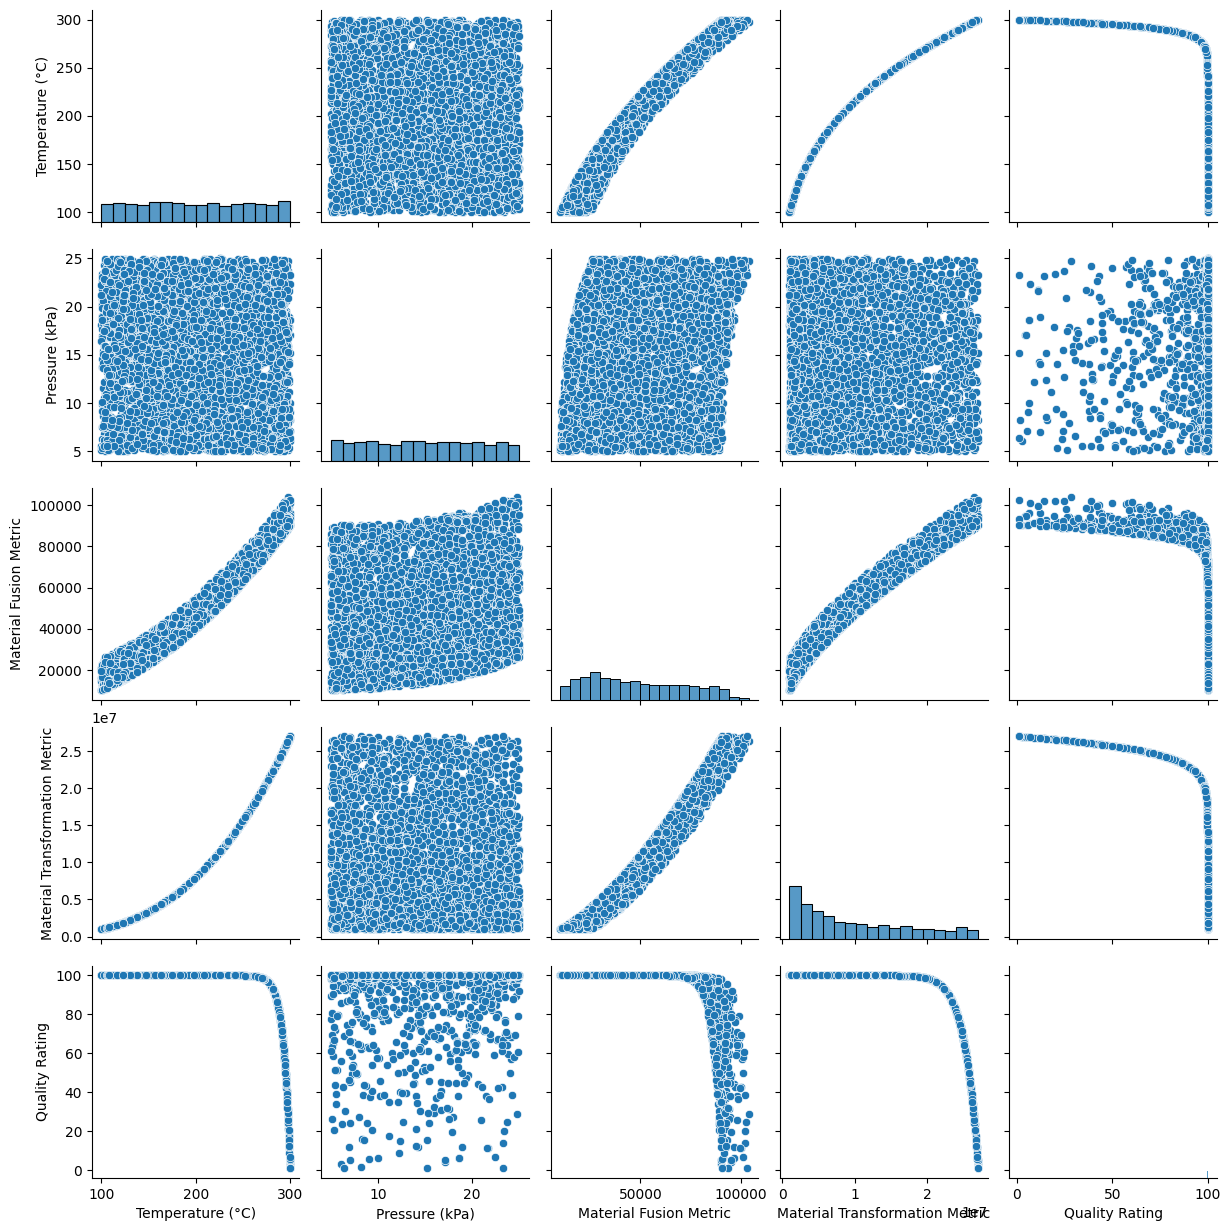

In [ ]:

import seaborn as sns
# Create the pairplot
sns.pairplot(df)  # Plots all numerical columns against each other
plt.show()

In [ ]:
correlations = df.corr()
print(correlations)

                                Temperature (°C)  Pressure (kPa)  \
Temperature (°C)                        1.000000       -0.024754   
Pressure (kPa)                         -0.024754        1.000000   
Material Fusion Metric                  0.974901        0.151095   
Material Transformation Metric          0.971210       -0.022862   
Quality Rating                         -0.461279        0.013129   

                                Material Fusion Metric  \
Temperature (°C)                              0.974901   
Pressure (kPa)                                0.151095   
Material Fusion Metric                        1.000000   
Material Transformation Metric                0.976708   
Quality Rating                               -0.511972   

                                Material Transformation Metric  Quality Rating  
Temperature (°C)                                      0.971210       -0.461279  
Pressure (kPa)                                       -0.022862        0.013129  

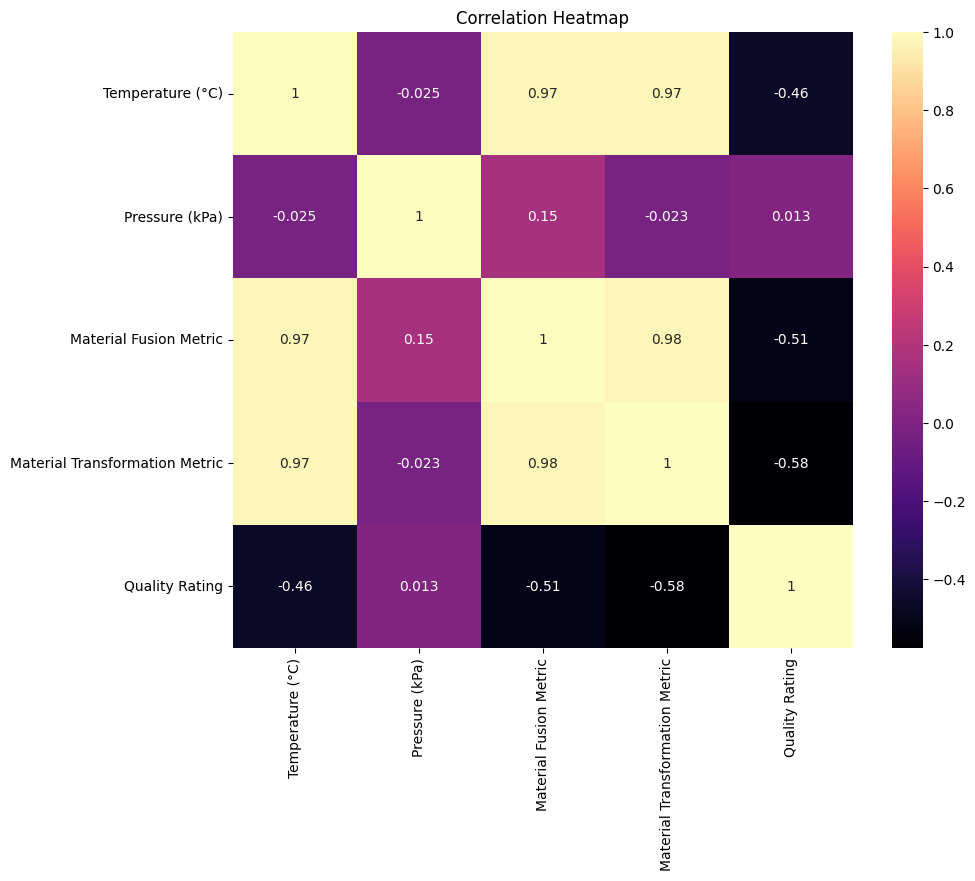

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlations, annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

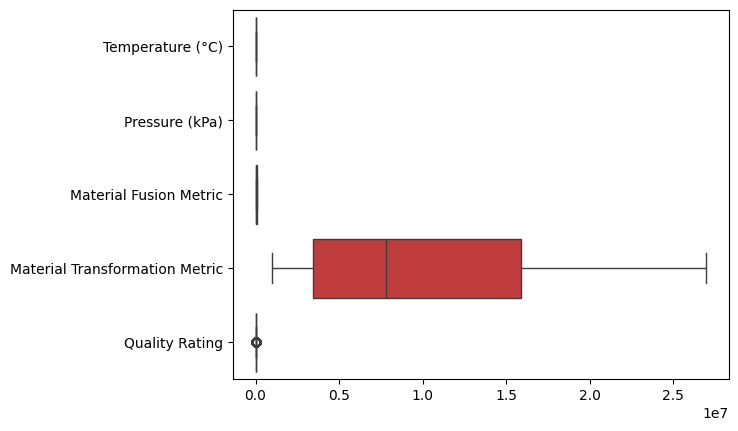

In [ ]:
sns.boxplot(data=df, orient='h')
plt.show()

#Defining independent(X) and dependent features(y)

In [ ]:
X = df.drop('Quality Rating', axis=1)
y = df['Quality Rating']

#Preprocessing the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
98,265.788006,22.812104,6063.183507,82514.501772,1.877561e+07
1446,281.579692,10.898344,3068.752215,80581.561347,2.232552e+07
1525,281.649676,16.711005,4706.649020,83993.216166,2.234201e+07
40,171.901580,21.600059,3713.084262,39627.931742,5.079251e+06
3525,212.382292,9.999574,2123.732409,46106.109930,9.579666e+06


In [ ]:
X_test.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
3256,158.637458,11.608450,1841.535039,26730.152796,3.992111e+06
142,187.172985,7.079642,1325.117701,35388.567392,6.557317e+06
2623,263.449717,17.486238,4606.744412,74752.494261,1.828462e+07
3741,178.757649,18.348884,3280.003386,38132.027706,5.711738e+06
2858,263.411397,13.758436,3624.128934,71989.961242,1.827676e+07


#Scaling the splitted data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
y_pred

array([-1.41310084e+08, -2.32242570e+08, -6.47952916e+08, ...,
       -9.27185785e+08, -1.60747498e+08, -5.34592832e+08])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.1033211381346915e+17
R-squared: -1045709638781022.8


In [ ]:
lr.score(X_train_scaled, y_train)

0.4939150199161434

In [ ]:
print(lr.score(X_test_scaled, y_test))

0.5232024177326103


#polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)



#print(y_pred)


In [ ]:
poly_model = linear_model.LinearRegression()

poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred= poly_model.predict(X_test_poly)

In [ ]:
y_pred

array([ 98.76926821,  99.40800949, 100.77350524, ...,  53.1264892 ,
        97.57860322, 103.52074761])

In [ ]:
#score
print(poly_model.score(X_train_poly, y_train))

0.814199091537986


In [ ]:
 #score
print(poly_model.score(X_test_poly, y_test))

0.8379316729462084


In [ ]:
MAE_Poly = mean_absolute_error(y_test,y_pred)
MSE_Poly = mean_squared_error(y_test,y_pred)
R2_Score_poly =r2_score(y_test, y_pred)

In [ ]:
print('MAE:',MAE_Poly)
print('MSE:',MSE_Poly)
print('R2 Score:',R2_Score_poly)

MAE: 3.538761685830757
MSE: 32.5981252799515
R2 Score: 0.8379316729462084


In [ ]:
from scipy.stats import probplot

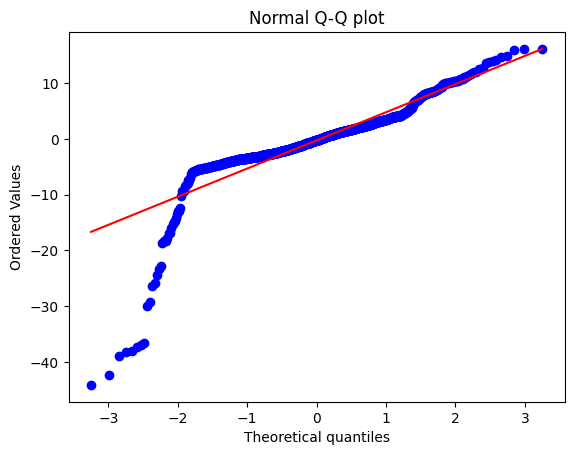

In [ ]:
probplot(y_test-y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()